## **Project Overview**
We will:

* Load and preprocess the CIFAR-10 dataset.
* Partition the dataset into training, validation, and test sets.
* Build a CNN model architecture.
* Compile the model with appropriate loss function and optimizer.
* Train the model with training and validation data.
* Evaluate the model on the test data.
* Visualize the results and reflect on the learnings.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Explanation:

* NumPy and Matplotlib are used for numerical computations and plotting.
* Seaborn for advanced data visualization.
* TensorFlow Keras for building and training the neural network.
* Scikit-learn for splitting the dataset and evaluating the model.

### **2. Load and Preprocess the CIFAR-10 Dataset**

In [ ]:
# Load the CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_full = to_categorical(y_train_full, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


Explanation:

* The CIFAR-10 dataset is loaded and split into training and test sets.
* Pixel values are normalized to improve training performance.
* Labels are one-hot encoded for multi-class classification.

### **3. Partition Validation Set from Training Data**

In [ ]:
# Split the training data to create a validation set (10% of training data)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.1, random_state=42)

print(f'Training set size: {x_train.shape[0]} samples')
print(f'Validation set size: {x_val.shape[0]} samples')
print(f'Test set size: {x_test.shape[0]} samples')

Training set size: 45000 samples
Validation set size: 5000 samples
Test set size: 10000 samples


Explanation:

* The training data is further split to create a validation set.
* train_test_split from Scikit-learn ensures random and reproducible splitting.
* Printing the sizes helps verify the partitioning.

### **4. Explore the Data**

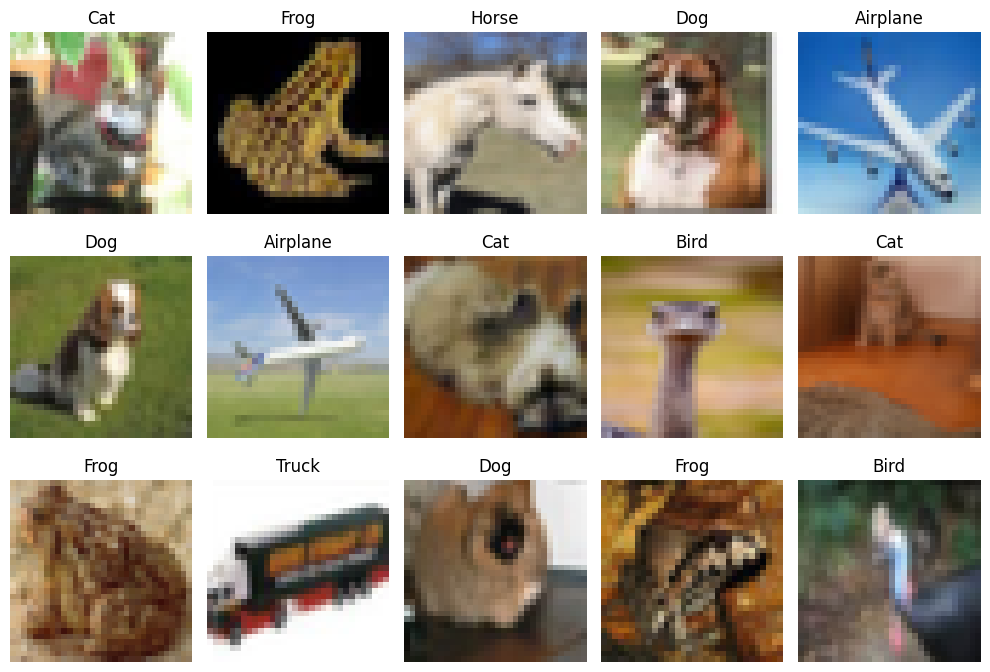

In [ ]:
# Define class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display sample images from the training set
fig, axes = plt.subplots(3, 5, figsize=(10, 7))
axes = axes.ravel()

for i in range(15):
    idx = np.random.randint(0, len(x_train))
    axes[i].imshow(x_train[idx])
    axes[i].set_title(class_names[np.argmax(y_train[idx])])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Explanation:

* Visualizes random images with their corresponding labels to understand the dataset.

### **5. Build the CNN Model**

In [ ]:
model = Sequential()

# Convolutional Layer Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Convolutional Layer Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Convolutional Layer Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Display the model's architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

Explanation:

* The model has three convolutional blocks to extract hierarchical features.
* BatchNormalization layers improve training speed and stability.
* Dropout layers help prevent overfitting by randomly dropping neurons.
* The model ends with a fully connected layer and an output layer with 'softmax' activation.

### **6. Compile the Model**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Explanation:

* The Adam optimizer is adaptive and efficient for training deep networks.
* Categorical Crossentropy is suitable for multi-class classification tasks.
* Monitoring accuracy as the performance metric.

### **7. Define Callbacks**

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

Explanation:

* EarlyStopping halts training when validation loss stops improving.
*restore_best_weights ensures the model retains the weights from the epoch with the best validation loss.

### **8. Train the Model**

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.3790 - loss: 1.9941 - val_accuracy: 0.6058 - val_loss: 1.1218
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.6206 - loss: 1.0762 - val_accuracy: 0.6736 - val_loss: 0.9199
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6822 - loss: 0.9014 - val_accuracy: 0.6800 - val_loss: 0.9378
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7167 - loss: 0.7966 - val_accuracy: 0.6986 - val_loss: 0.8915
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7386 - loss: 0.7470 - val_accuracy: 0.7530 - val_loss: 0.7144
Epoch 6/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7783 - loss: 0.6305 - val_accuracy: 0.7760 - val_loss: 0.6283
Epoch 7/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7994 - loss: 0.5782 - val_accuracy: 0.7864 - val_loss: 0.6124
Epoch 8/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8061 - loss: 0.5520 - val

Explanation:

* Training the model with a batch size of 64 and up to 100 epochs.
* Validation data is used to monitor performance after each epoch.
* Training may stop early due to the early stopping callback.

### **9. Evaluate the Model**

In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8525 - loss: 0.5006
Test Accuracy: 0.8525


Explanation:

* Evaluating the model on the test set provides an unbiased assessment of its performance.

### **10. Visualize Training History**

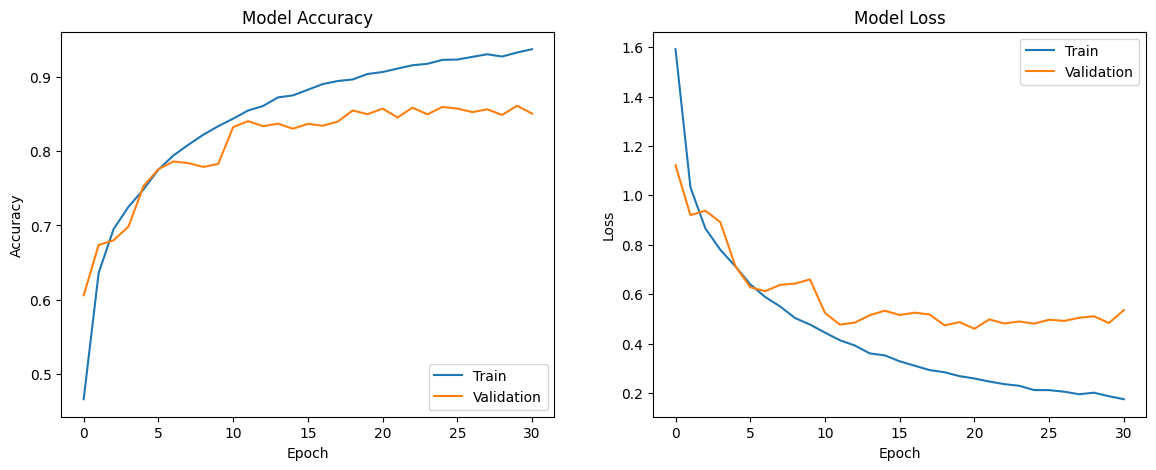

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

Explanation:

* Plots help visualize overfitting or underfitting by comparing training and validation metrics.

## **11. Confusion Matrix and Classification Report**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


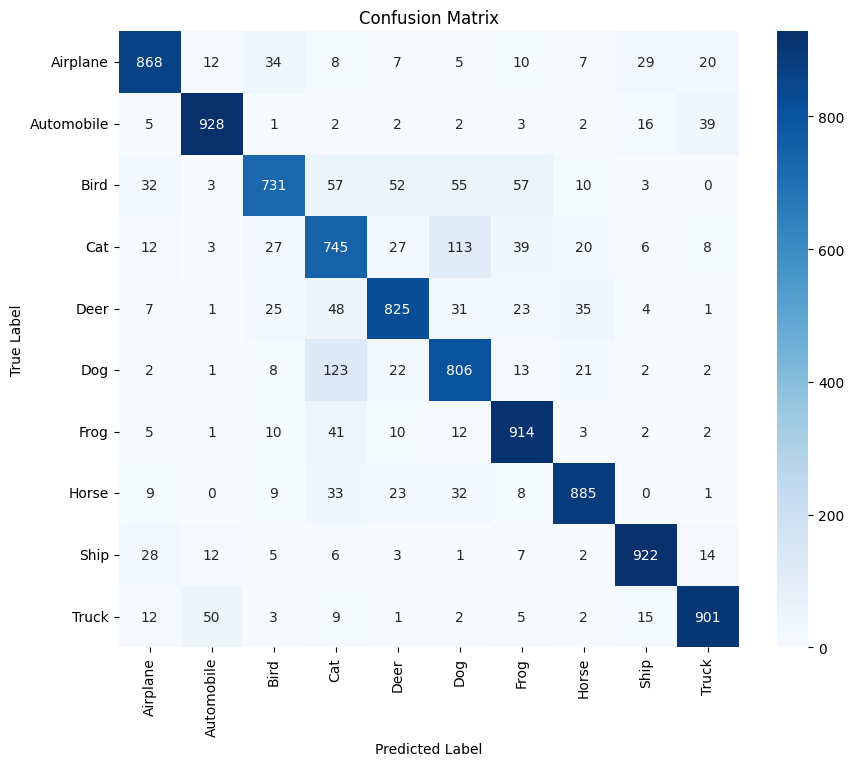

Classification Report
              precision    recall  f1-score   support

    Airplane       0.89      0.87      0.88      1000
  Automobile       0.92      0.93      0.92      1000
        Bird       0.86      0.73      0.79      1000
         Cat       0.69      0.74      0.72      1000
        Deer       0.85      0.82      0.84      1000
         Dog       0.76      0.81      0.78      1000
        Frog       0.85      0.91      0.88      1000
       Horse       0.90      0.89      0.89      1000
        Ship       0.92      0.92      0.92      1000
       Truck       0.91      0.90      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
# Predict classes for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            cmap='Blues', xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(y_true_classes, y_pred_classes,
                            target_names=class_names))

Explanation:

* The confusion matrix shows how often each class was correctly or incorrectly predicted.
* The classification report provides precision, recall, and F1-score for each class.

### **12. Save the Model**

In [ ]:
# Save the trained model for future use
model.save('cifar10_cnn_model.keras')

Explanation:

* Saving the model allows you to load and use it later without retraining.